In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, auc
from pandas.tools.plotting import scatter_matrix
from scipy.stats import chi2_contingency

% matplotlib inline

import seaborn
seaborn.set()
plt.rcParams['figure.figsize'] = (15, 6)

# Import data

In [2]:
alldata = pd.read_csv('/home/kristy/Downloads/breast-cancer-wisconsin.csv', index_col=0, header=None, 
                      names=['thickness','size_unif','shape_unif','margins','cell_size','bare_nuclei','chromatin','normal_nuc','mitoses','tumor'])

In [3]:
alldata.head()

,thickness,size_unif,shape_unif,margins,cell_size,bare_nuclei,chromatin,normal_nuc,mitoses,tumor
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
alldata.shape

(699, 10)

In [5]:
alldata.dtypes

thickness       int64
size_unif       int64
shape_unif      int64
margins         int64
cell_size       int64
bare_nuclei    object
chromatin       int64
normal_nuc      int64
mitoses         int64
tumor           int64
dtype: object

In [6]:
# For first pass, just drop rows with missing data
clean_data = alldata[alldata.bare_nuclei!='?'].copy()

# Convert to int
clean_data.bare_nuclei = clean_data.bare_nuclei.astype(int)

In [7]:
clean_data.shape

(683, 10)

In [206]:
clean_data.dtypes

thickness      int64
size_unif      int64
shape_unif     int64
margins        int64
cell_size      int64
bare_nuclei    int64
chromatin      int64
normal_nuc     int64
mitoses        int64
tumor          int64
dtype: object

# Exploratory data analysis

In [207]:
clean_data.describe()

,thickness,size_unif,shape_unif,margins,cell_size,bare_nuclei,chromatin,normal_nuc,mitoses,tumor
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


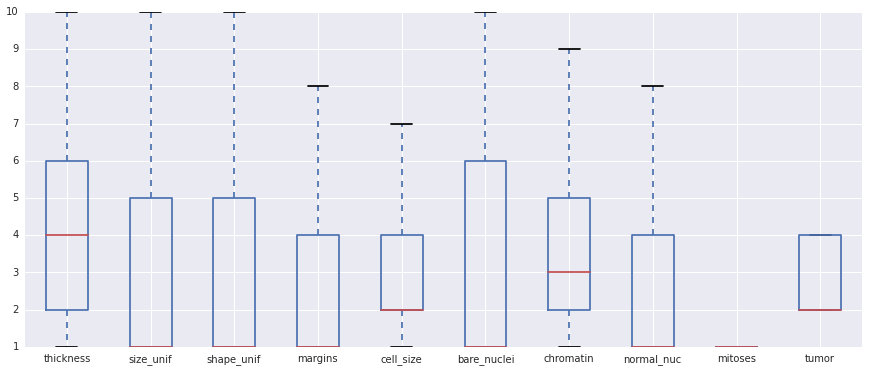

In [208]:
# histograms
clean_data.boxplot();

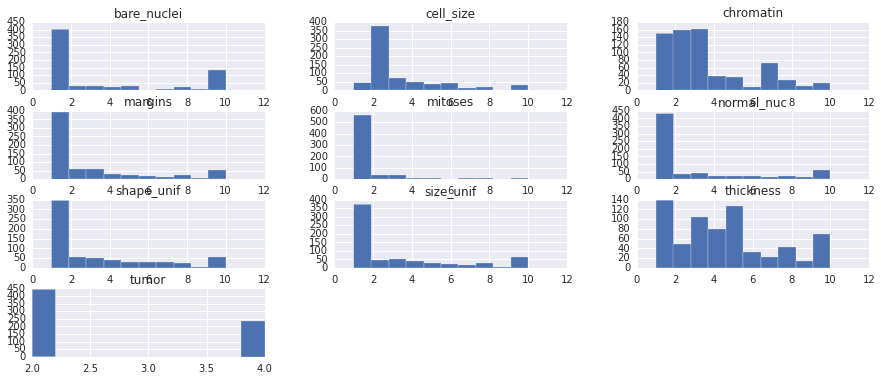

In [209]:
clean_data.hist();

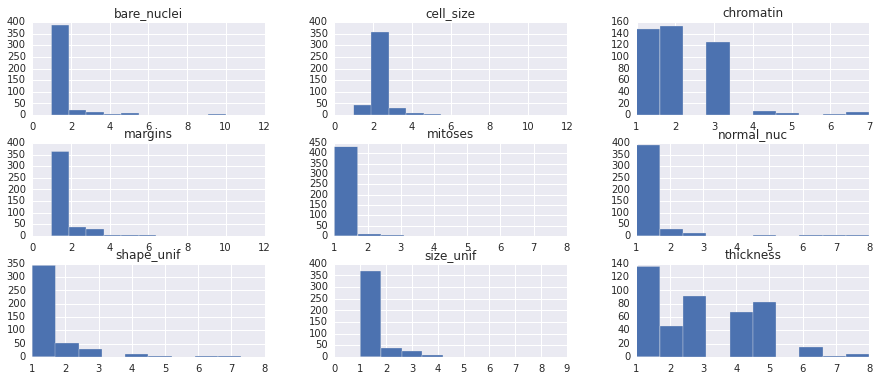

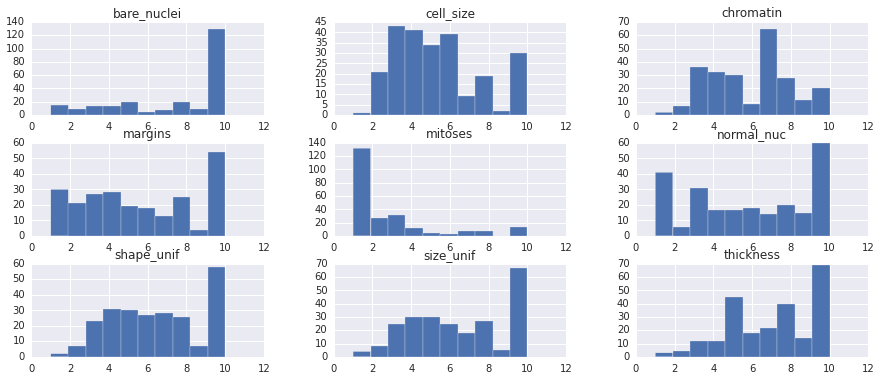

In [246]:
clean_data.groupby('tumor').hist();

In [9]:
clean_data.tumor.value_counts(normalize=True)

2    0.650073
4    0.349927
dtype: float64

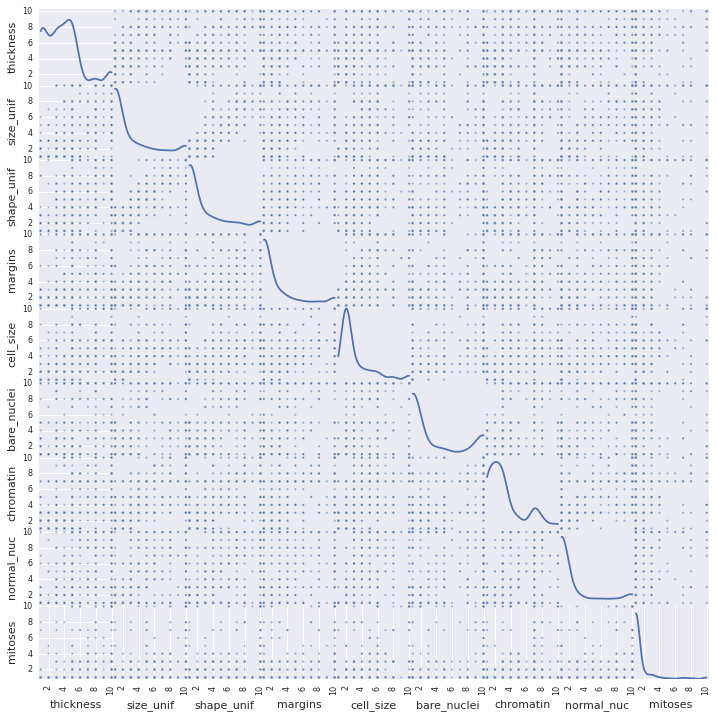

In [236]:
scatter_matrix(clean_data.iloc[:,:-1], alpha=0.5, figsize=(12, 12), diagonal='kde');

In [13]:
freqs = pd.crosstab(clean_data.mitoses, clean_data.tumor)
freqs.apply(lambda r: r/r.sum(), axis=1)

tumor,2,4
mitoses,,
1,0.765542,0.234458
2,0.228571,0.771429
3,0.060606,0.939394
4,0.000000,1.000000
5,0.166667,0.833333
6,0.000000,1.000000
7,0.111111,0.888889
8,0.125000,0.875000
10,0.000000,1.000000


In [11]:
for col in clean_data.columns[:-1]:
    freqs = pd.crosstab(clean_data[col], clean_data.tumor)
    chi2, p, dof, _ = chi2_contingency(freqs)
    print '{:12s}: chi2({:d}) = {:8.2f}, p = {:8.4f}'.format(col, dof, chi2, p)

thickness   : chi2(9) =   378.08, p =   0.0000
size_unif   : chi2(9) =   539.79, p =   0.0000
shape_unif  : chi2(9) =   523.07, p =   0.0000
margins     : chi2(9) =   390.06, p =   0.0000
cell_size   : chi2(9) =   447.86, p =   0.0000
bare_nuclei : chi2(9) =   489.01, p =   0.0000
chromatin   : chi2(9) =   453.21, p =   0.0000
normal_nuc  : chi2(9) =   416.63, p =   0.0000
mitoses     : chi2(8) =   191.97, p =   0.0000


# Preprocessing

In [31]:
# Divide into features and labels
features = clean_data.iloc[:,:-1]
names = features.columns.tolist()
labels = clean_data.tumor

In [212]:
# Normalize (but all on same scale, so probably not needed)

In [213]:
# PCA

# Logistic regression (as continuous features)

In [15]:
# Divide into train/valid
train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, train_size=0.8)

In [35]:
reg = LogisticRegression()

In [36]:
# fit model
reg.fit(X=train_features, y=train_labels)

# make model predictions
train_pred = reg.predict(train_features)
valid_pred = reg.predict(valid_features)
train_prob = reg.predict_proba(train_features)
valid_prob = reg.predict_proba(valid_features)

# print confusiion matrix and accuracy
print "training set:", str(reg.score(train_features, train_labels))
print confusion_matrix(train_labels, train_pred)

print "validation set:", str(reg.score(valid_features, valid_labels))
print confusion_matrix(valid_labels, valid_pred)


training set: 0.967032967033
[[339   8]
 [ 10 189]]
validation set: 0.978102189781
[[95  2]
 [ 1 39]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [43]:
reg.raw_coef_

array([[ 0.17879749,  0.08706761,  0.31545428,  0.16554113,  0.0394103 ,
         0.29850282,  0.23572133,  0.18257312,  0.23229662, -6.05749491]])

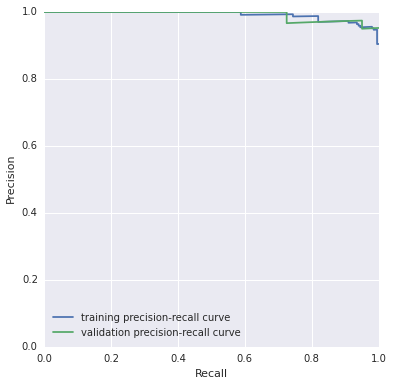

In [327]:
print precision_score(train_labels, train_pred, pos_label=4)
print recall_score(train_labels, train_pred, pos_label=4)

# compute precision-recall curves
precision = dict()
recall = dict()
precision[0], recall[0], _ = precision_recall_curve(train_labels==4, train_prob[:,1])
precision[1], recall[1], _ = precision_recall_curve(valid_labels==4, valid_prob[:,1])

# plot precision-recall curve
plt.figure(figsize=[6,6])
plt.plot(recall[0], precision[0], label='training precision-recall curve')
plt.plot(recall[1], precision[1], label='validation precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

Performance seems to be better for validation set than for training set... not sure why yet.

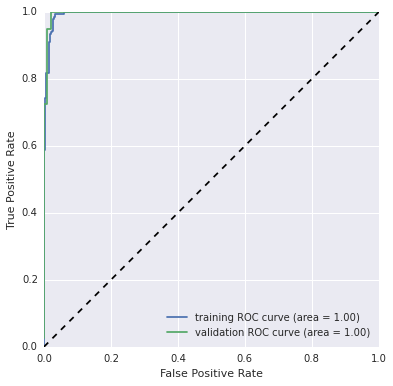

In [321]:
# compute ROC curves for training and validation sets
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], thresh = roc_curve(train_labels, train_prob[:,1], pos_label=4)
roc_auc[0] = auc(fpr[0],tpr[0])
fpr[1], tpr[1], thresh = roc_curve(valid_labels, valid_prob[:,1], pos_label=4)
roc_auc[1] = auc(fpr[1],tpr[1])

# plot ROC curves
plt.figure(figsize=[6,6])
plt.plot(fpr[0], tpr[0], label='training ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='validation ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

The model seems too good to be believable.  This might be because some of the features are likely used in defining benign vs. malignant tumors.

# Logistic regression (with categorical features)

In [47]:
factors = pd.get_dummies(features, columns=features.columns)

In [49]:
factors.head()

,thickness_1,thickness_2,thickness_3,thickness_4,thickness_5,thickness_6,thickness_7,thickness_8,thickness_9,thickness_10,...,normal_nuc_10,mitoses_1,mitoses_2,mitoses_3,mitoses_4,mitoses_5,mitoses_6,mitoses_7,mitoses_8,mitoses_10
1000025,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1002945,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1015425,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1016277,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1017023,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
train_features, valid_features, train_labels, valid_labels = train_test_split(factors, labels, train_size=0.8)

In [53]:
reg = LogisticRegression()

# fit model
reg.fit(X=train_features, y=train_labels)

# make model predictions
train_pred = reg.predict(train_features)
valid_pred = reg.predict(valid_features)
train_prob = reg.predict_proba(train_features)
valid_prob = reg.predict_proba(valid_features)

# print confusiion matrix and accuracy
print "training set:", str(reg.score(train_features, train_labels))
print confusion_matrix(train_labels, train_pred)

print "validation set:", str(reg.score(valid_features, valid_labels))
print confusion_matrix(valid_labels, valid_pred)


training set: 0.992673992674
[[347   3]
 [  1 195]]
validation set: 0.978102189781
[[92  2]
 [ 1 42]]


Now accuracy is better for training data than for validation data.

In [55]:
reg.coef_.shape

(1, 89)

0.984848484848
0.994897959184


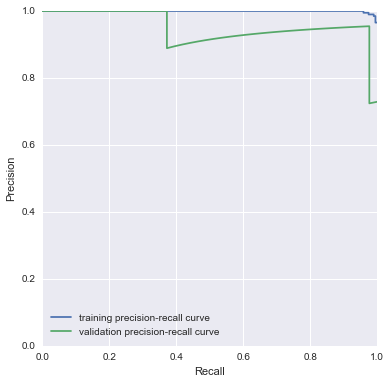

In [56]:
print precision_score(train_labels, train_pred, pos_label=4)
print recall_score(train_labels, train_pred, pos_label=4)

# compute precision-recall curves
precision = dict()
recall = dict()
precision[0], recall[0], _ = precision_recall_curve(train_labels==4, train_prob[:,1])
precision[1], recall[1], _ = precision_recall_curve(valid_labels==4, valid_prob[:,1])

# plot precision-recall curve
plt.figure(figsize=[6,6])
plt.plot(recall[0], precision[0], label='training precision-recall curve')
plt.plot(recall[1], precision[1], label='validation precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

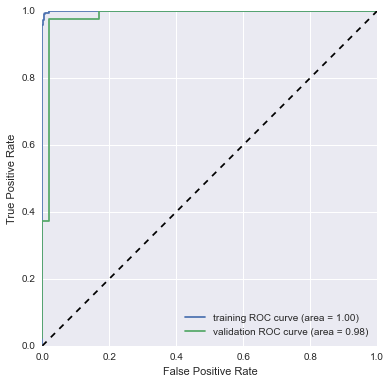

In [57]:
# compute ROC curves for training and validation sets
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], thresh = roc_curve(train_labels, train_prob[:,1], pos_label=4)
roc_auc[0] = auc(fpr[0],tpr[0])
fpr[1], tpr[1], thresh = roc_curve(valid_labels, valid_prob[:,1], pos_label=4)
roc_auc[1] = auc(fpr[1],tpr[1])

# plot ROC curves
plt.figure(figsize=[6,6])
plt.plot(fpr[0], tpr[0], label='training ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='validation ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

This is slightly more believable than the fit with features treated as numerical, but not by much.

# Random forest

# SVM